In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data = pd.read_csv("train.csv",index_col='PassengerId')
train_data.head(3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [4]:
test_data = pd.read_csv("test.csv")
test_data.head(3)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q


## Explore the Data

In [5]:
train_data.shape

(891, 11)

In [6]:
test_data.shape

(418, 11)

## Drop irrelevant information

In [7]:
train_data.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.drop(['Name','Pclass','Ticket', 'Cabin'],axis=1,inplace=True)

In [9]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,male,22.0,1,0,7.2500,S
2,1,female,38.0,1,0,71.2833,C
3,1,female,26.0,0,0,7.9250,S
4,1,female,35.0,1,0,53.1000,S
5,0,male,35.0,0,0,8.0500,S


In [10]:
test_data.drop(['Name','Pclass','Ticket', 'Cabin'],axis=1,inplace=True)

In [11]:
test_data.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,male,34.5,0,0,7.8292,Q
1,893,female,47.0,1,0,7.0000,S
2,894,male,62.0,0,0,9.6875,Q
3,895,male,27.0,0,0,8.6625,S
4,896,female,22.0,1,1,12.2875,S


## EDA

In [12]:
train_data.isnull().sum()

Survived      0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

In [13]:
test_data.isnull().sum()

PassengerId     0
Sex             0
Age            86
SibSp           0
Parch           0
Fare            1
Embarked        0
dtype: int64

## Count plot for categorical Data

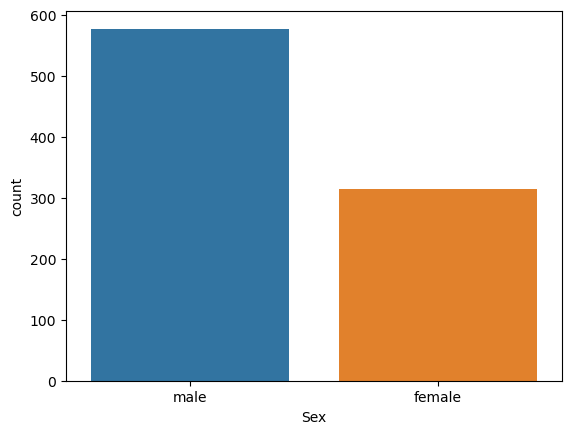

In [14]:
sns.countplot(data=train_data,x=train_data['Sex'])
plt.show()

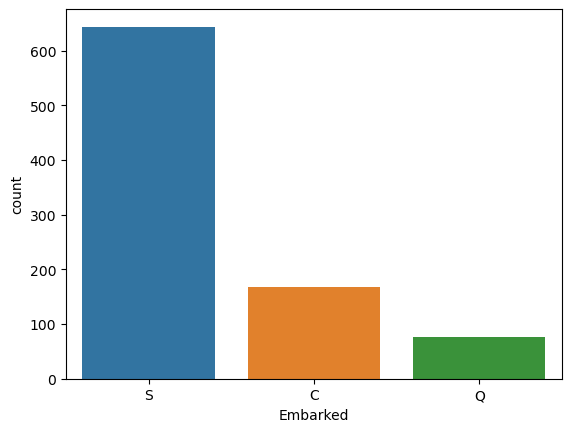

In [15]:
sns.countplot(data=train_data,x=train_data['Embarked'])
plt.show()

## Covert categorical columns in numerical values to apply algoritm on it

In [16]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()

In [17]:
label_encode.fit(train_data['Sex'])

LabelEncoder()

In [18]:
train_data['Sex'] = label_encode.transform(train_data['Sex'])

In [19]:
encoder = LabelEncoder()

In [20]:
encoder.fit(train_data['Embarked'])

LabelEncoder()

In [21]:
train_data['Embarked'] = encoder.transform(train_data['Embarked'])

In [22]:
train_data.head()

,Survived,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,
1,0,1,22.0,1,0,7.2500,2
2,1,0,38.0,1,0,71.2833,0
3,1,0,26.0,0,0,7.9250,2
4,1,0,35.0,1,0,53.1000,2
5,0,1,35.0,0,0,8.0500,2


### Let's also prepare test data for the model application 

In [23]:
test_data['Sex'] = label_encode.transform(test_data['Sex'])

In [24]:
test_data['Embarked'] = encoder.transform(test_data['Embarked'])

In [25]:
test_data.head()

,PassengerId,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,1,34.5,0,0,7.8292,1
1,893,0,47.0,1,0,7.0000,2
2,894,1,62.0,0,0,9.6875,1
3,895,1,27.0,0,0,8.6625,2
4,896,0,22.0,1,1,12.2875,2


## Data Preprocessing 

In [26]:
train_data['Age'].mean()

29.69911764705882

In [27]:
train_data['Embarked'].mode()[0]

2

In [28]:
train_data['Age'].fillna(value=train_data['Age'].mean(),inplace=True)

In [29]:
train_data['Embarked'].fillna(value=train_data['Embarked'].mode()[0],inplace=True)

In [30]:
train_data.isnull().sum()

Survived    0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
dtype: int64

In [31]:
test_data['Age'].fillna(test_data['Age'].mean(),inplace=True)

In [32]:
test_data['Fare'].fillna(test_data['Fare'].mean(),inplace=True)

In [33]:
test_data.isnull().sum()

PassengerId    0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [34]:
result_data = test_data.drop('PassengerId',axis = 1)
result_data.index = test_data['PassengerId']
result_data.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
892,1,34.5,0,0,7.8292,1
893,0,47.0,1,0,7.0000,2
894,1,62.0,0,0,9.6875,1
895,1,27.0,0,0,8.6625,2
896,0,22.0,1,1,12.2875,2


In [35]:
y,x = train_data['Survived'],train_data.drop('Survived',axis=1)

In [36]:
y.head()

PassengerId
1    0
2    1
3    1
4    1
5    0
Name: Survived, dtype: int64

In [37]:
x.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
1,1,22.0,1,0,7.2500,2
2,0,38.0,1,0,71.2833,0
3,0,26.0,0,0,7.9250,2
4,0,35.0,1,0,53.1000,2
5,1,35.0,0,0,8.0500,2


### Train Test splitting of the Data

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.1,random_state=42)

In [40]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((801, 6), (90, 6), (801,), (90,))

## Model building and training

In [41]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [42]:
from sklearn.ensemble import RandomForestClassifier

In [43]:
rfc = RandomForestClassifier(random_state=42)

In [44]:
rfc.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [45]:
y_pred = rfc.predict(x_test)

In [46]:
rfc_entropy = RandomForestClassifier(n_estimators=20,criterion='entropy',random_state=42)

In [47]:
rfc_entropy.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20, random_state=42)

In [48]:
test_pred = rfc_entropy.predict(x_test)

In [49]:
accuracy_score(y_test,test_pred)

0.8222222222222222

## Best Possible criterion for model building is 'Ginni' now Checking the accuracy of prepared model based on available training data

In [50]:
accuracy_score(y_test,y_pred)

0.8333333333333334

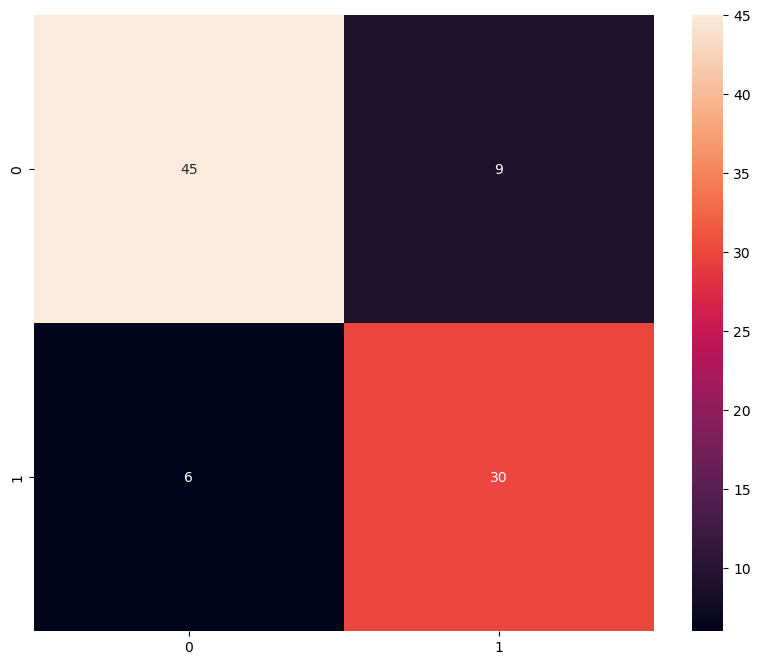

In [51]:
plt.figure(figsize=(10,8))
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()

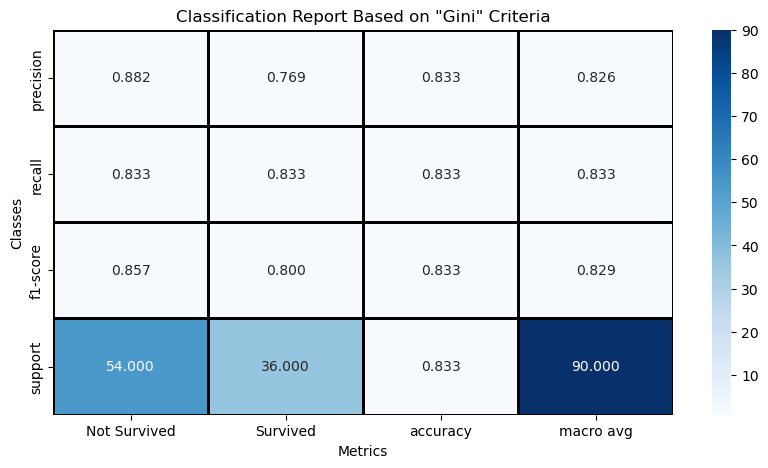

In [52]:
report = classification_report(y_test, y_pred, target_names=['Not Survived','Survived'], output_dict=True)

df_report = pd.DataFrame(report).transpose()

plt.figure(figsize=(10, 5))
sns.heatmap(df_report.iloc[:-1, :].T, annot=True, cmap="Blues", fmt=".3f", linewidths=1, linecolor="black")
plt.title('Classification Report Based on "Gini" Criteria')
plt.xlabel('Metrics')
plt.ylabel('Classes')
plt.show()

## Let's rebuild our decision tree for entire training data set because there is no improvement in testing accuracy even with higher number of decision trees

e.g. :- 

In [53]:
rfc2 = RandomForestClassifier(n_estimators=9000,random_state=42)

In [54]:
rfc2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=9000, random_state=42)

In [55]:
y_pred2 = rfc2.predict(x_test)

In [56]:
accuracy_score(y_test,y_pred2)

0.8222222222222222

## Final Model Creation to be trained with the entire training Data

In [57]:
final_rfc = RandomForestClassifier(random_state=42)

In [58]:
final_rfc.fit(x,y)

RandomForestClassifier(random_state=42)

In [59]:
result_data['Survived'] = final_rfc.predict(result_data)

In [60]:
result_data.head()

,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
PassengerId,,,,,,,
892,1,34.5,0,0,7.8292,1,0
893,0,47.0,1,0,7.0000,2,0
894,1,62.0,0,0,9.6875,1,0
895,1,27.0,0,0,8.6625,2,1
896,0,22.0,1,1,12.2875,2,1


In [61]:
result_data.drop(['Sex','Age','SibSp','Parch','Fare','Embarked'],axis=1,inplace=True)
result_data.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,1
896,1


In [62]:
result_data.shape

(418, 1)

In [63]:
result_data.to_csv("results.csv")

## The Classification achived for the test data as per Kaggle is 75.598 %

### Hence i will do the Hyperparameter tuning for the model

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [67]:
rf = RandomForestClassifier()

In [68]:
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

In [69]:
grid_search.fit(x, y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy')

In [70]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)

Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Best accuracy found:  0.822666499278137


In [73]:
modified_final_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 1, min_samples_split= 2, n_estimators = 300,random_state=42)

In [74]:
modified_final_model.fit(x,y)

RandomForestClassifier(max_depth=10, n_estimators=300, random_state=42)

In [76]:
result_data1 = test_data.drop('PassengerId',axis = 1)
result_data1.index = test_data['PassengerId']
result_data1.head()

,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,
892,1,34.5,0,0,7.8292,1
893,0,47.0,1,0,7.0000,2
894,1,62.0,0,0,9.6875,1
895,1,27.0,0,0,8.6625,2
896,0,22.0,1,1,12.2875,2


In [78]:
result_data1['Survived'] = modified_final_model.predict(result_data1)

In [79]:
result_data1.drop(['Sex','Age','SibSp','Parch','Fare','Embarked'],axis=1,inplace=True)
result_data1.head()

,Survived
PassengerId,
892,0
893,0
894,0
895,0
896,1


In [80]:
result_data1.to_csv("results_new.csv")